# Chapter 5: Computing forward gravity. (Under development)

GemPy also brings a module to compute the forward gravity response. The idea is to be able to use gravity as a likelihood to validate the geological models within the Bayesian inference. In this chapter we will see how we can compute the gravity response of the sandstone model of chapter 2.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


First we just recreate the model as usual.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                     path_o = os.pardir+"/input_data/tut_SandStone/SandStone_Foliations.csv",
                     path_i = os.pardir+"/input_data/tut_SandStone/SandStone_Points.csv")

Setting the series and the formations order:

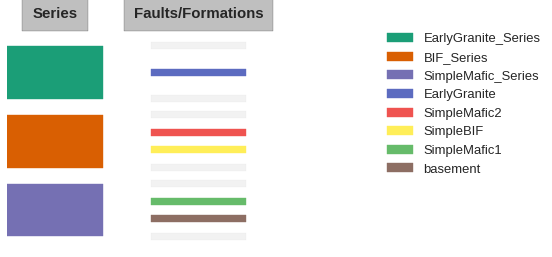

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2',
                                         'SimpleBIF', 'SimpleMafic1'],
              verbose=1)

Projection in 2D:

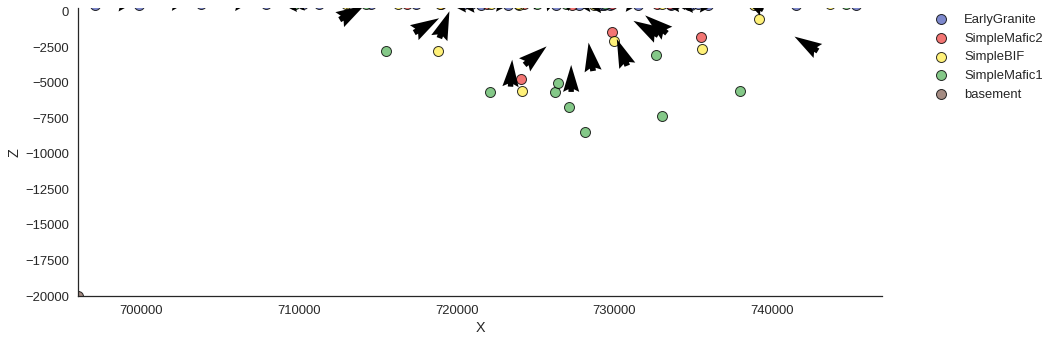

In [4]:
gp.plotting.plot_data(geo_data)

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [5]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [6]:
lith_block, fault_block = gp.compute_model(interp_data)

In [7]:
sol =  gp.compute_model(interp_data)

The green rectangle represent the area where we want to compute the forward gravity (in this case is due to this is the area where we have measured data). As we can see the original extent of the geological model is not going to be enough (remember that gravity is affected by a cone, not only the mass right below). An advantage of the method is that we can extrapolate as much as needed keeping in mind that the error will increase accordingly.

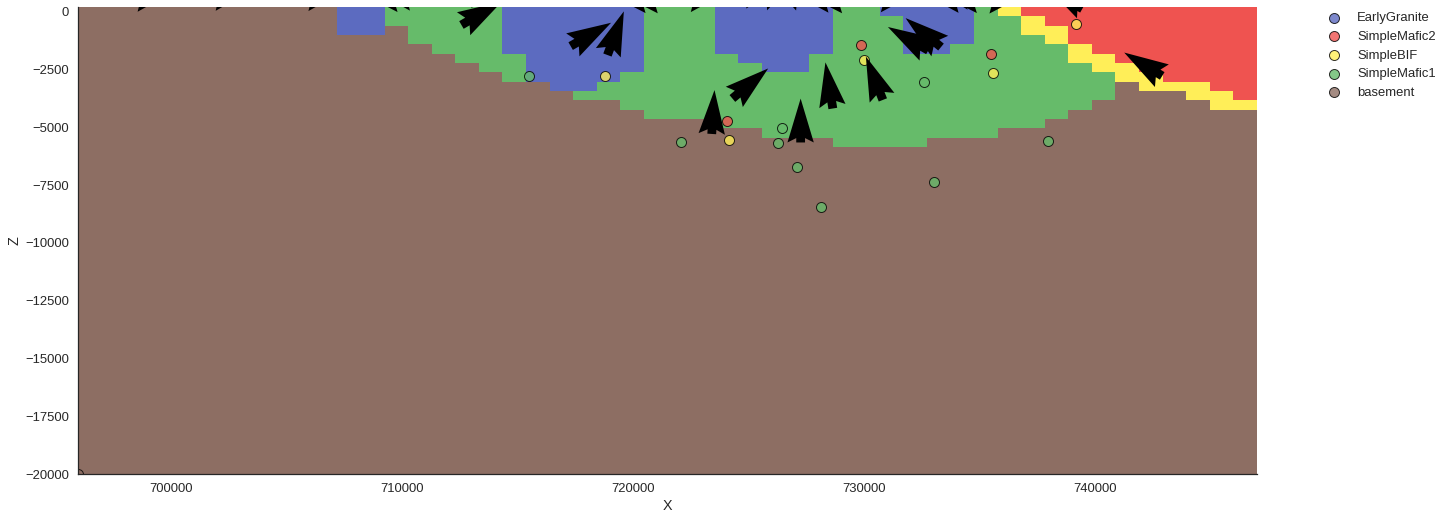

In [8]:
import matplotlib.pyplot as plt

gp.plotting.plot_section(geo_data, lith_block[0], 10, plot_data=True, direction='y')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),
                                747000 - 7.050000e+05,
                                6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [9]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith_block[1],
                               None,
                               original_scale=True)

In [10]:
gp.plotting.plot_surfaces_3D_real_time(geo_data, interp_data, ver_s, sim_s)

closing vtk


So we recalculate all just adding some padding around the measured data (the green rectangle)

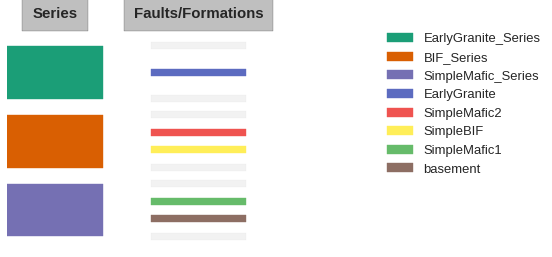

In [3]:
# Importing the data from csv files and settign extent and resolution
geo_data_extended = gp.create_data([696000-10000, 
                                    747000 + 20600, 
                                    6863000 - 20600,6950000 + 20600, 
                                    -20000, 600],
                                   [50, 50, 50],
                         path_o = os.pardir+"/input_data/tut_SandStone/SandStone_Foliations.csv",
                         path_i = os.pardir+"/input_data/tut_SandStone/SandStone_Points.csv")


# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data_extended, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"],
                      order_formations= ['EarlyGranite', 'SimpleMafic2', 
                                         'SimpleBIF', 'SimpleMafic1'],
              verbose=1)


In [4]:
geo_data_extended.set_formations(formation_values=[2.61,2.92,3.1,2.92,2.61],
                        formation_order=['EarlyGranite', 'SimpleMafic2',
                                         'SimpleBIF', 'SimpleMafic1',
                                         'basement'])
geo_data_extended.formations

,value,formation_number
EarlyGranite,2.61,1
SimpleMafic2,2.92,2
SimpleBIF,3.10,3
SimpleMafic1,2.92,4
basement,2.61,5


In [5]:
lith_ext, fautl = gp.compute_model(interp_data_extended)

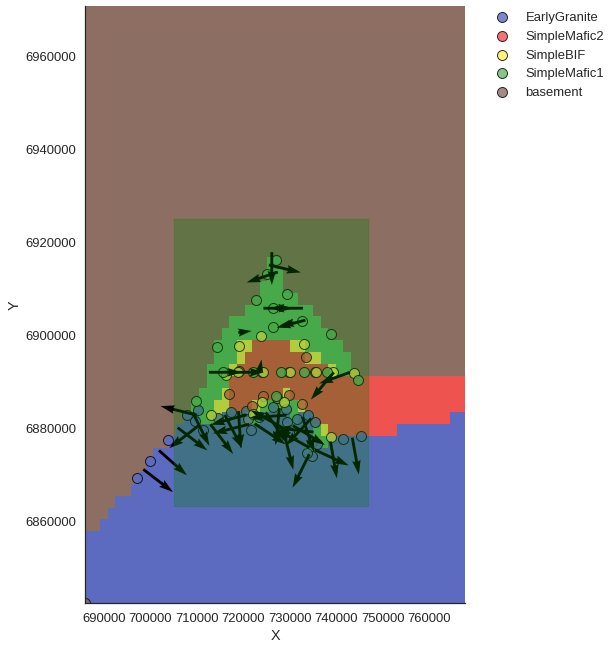

In [6]:
import matplotlib.pyplot as plt

gp.plotting.plot_section(geo_data_extended, lith_ext[0], -1, plot_data=True, direction='z')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

from matplotlib.patches import Rectangle

currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((7.050000e+05, 6863000),  747000 - 7.050000e+05,
                                 6925000 - 6863000,
                      alpha=0.3, fill='none', color ='green' ))

In [7]:
interp_data_grav = gp.InterpolatorData(geo_data_extended,
                    output='gravity', compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [8]:
gp.set_geophysics_obj(interp_data_grav,
                      [7.050000e+05,747000,6863000,6925000,-20000, 200],
                      [50, 50],)


In [9]:
gp.precomputations_gravity(interp_data_grav, 25);

In [10]:
lith, fault, grav = gp.compute_model(interp_data_grav, 'gravity')

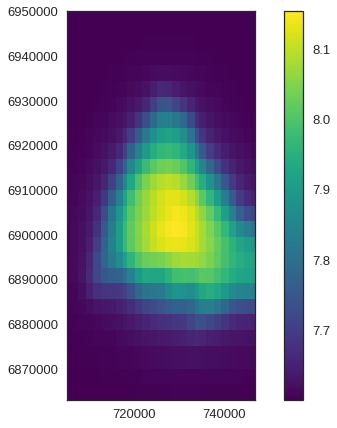

In [11]:
import matplotlib.pyplot as plt

plt.imshow(grav.reshape(50,50), cmap='viridis', origin='lower',
           extent=[7.050000e+05,747000,6863000,6950000] )
plt.colorbar()

In [12]:
extent = [696000-10000, 
        747000 + 20600, 
        6863000 - 20600,6950000 + 20600, 
        -20000, 600]
                                   
resolution = np.array([51, 51, 51])
g = np.meshgrid(
    np.linspace(extent[0] , extent[1] , resolution[0], dtype="float32"),
    np.linspace(extent[2] , extent[3] , resolution[1], dtype="float32"),
    np.linspace(extent[4] , extent[5] , resolution[2], dtype="float32"), indexing="ij"
)

values = np.vstack(map(np.ravel, g)).T.astype("float32")
values.shape

(132651, 3)

In [13]:
sol = gp.compute_model(interp_data_grav, 'gravity')

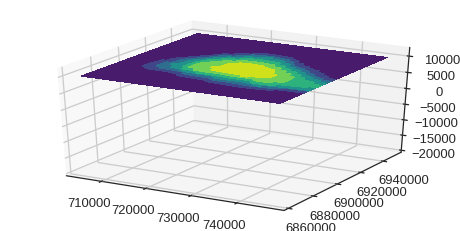

In [22]:

%matplotlib inline

import matplotlib.pyplot as plt
fig = plt.figure(figsize=plt.figaspect(0.5))
from mpl_toolkits.mplot3d import Axes3D

layer = 3
ax = fig.add_subplot(1, 1, 1, projection='3d')

xx, yy = np.meshgrid(np.linspace(7.050000e+05,747000,50),
                     np.linspace(6863000,6950000,50))



# ax.contourf(xx, yy, grav.reshape(50,50), offset=0, 
#                 cmap='viridis')

# ax.contourf(xx, yy, grav.reshape(50,50), offset=500, 
#                 cmap='viridis')

ax.set_zlim(-20000, 12000)



# ax.voxels(

#           values[:,0].reshape(resolution),
#           values[:,1].reshape(resolution),
#           values[:,2].reshape(resolution), 
#           sol[0][0].reshape(resolution-1) == 1,
#           facecolors = gp.plotting.colors.cmap.colors[1],
#           edgecolor=gp.plotting.colors.cmap.colors[1],
# alpha=.5)

# ax.voxels(

#           values[:,0].reshape(resolution),
#           values[:,1].reshape(resolution),
#           values[:,2].reshape(resolution), 
#           sol[0][0].reshape(resolution-1) == 2,
#         facecolors = gp.plotting.colors.cmap.colors[2],
#           edgecolor=gp.plotting.colors.cmap.colors[2],
# alpha=.5)

# ax.voxels(

#           values[:,0].reshape(resolution),
#           values[:,1].reshape(resolution),
#           values[:,2].reshape(resolution), 
#           sol[0][0].reshape(resolution-1) == 3,
#           facecolors = gp.plotting.colors.cmap.colors[3],
#           edgecolor=gp.plotting.colors.cmap.colors[3],
# alpha=.5)

# ax.voxels(

#           values[:,0].reshape(resolution),
#           values[:,1].reshape(resolution),
#           values[:,2].reshape(resolution), 
#           sol[0][0].reshape(resolution-1) == 4,
#           facecolors = gp.plotting.colors.cmap.colors[4],
#           edgecolor=gp.plotting.colors.cmap.colors[4],
# alpha=.5)

ax.voxels(

          values[:,0].reshape(resolution),
          values[:,1].reshape(resolution),
          values[:,2].reshape(resolution), 
          sol[0][0].reshape(resolution-1) == 5,
          facecolors = gp.plotting.colors.cmap.colors[5],
          edgecolor=gp.plotting.colors.cmap.colors[5],
alpha=.1, zorder=-1);
ax.voxels(

          values[:,0].reshape(resolution),
          values[:,1].reshape(resolution),
          values[:,2].reshape(resolution), 
          sol[0][0].reshape(resolution-1) == 6,
          facecolors = gp.plotting.colors.cmap.colors[6],
          edgecolor=gp.plotting.colors.cmap.colors[6],
alpha=.5);


ax.contourf(xx, yy, grav.reshape(50,50), offset=10000, 
                cmap='viridis', zorder=10)

# # create the figure
# fig = plt.figure()

# # show the reference image
# ax = fig.add_subplot(111, projection='3d')



#ax.auto_scale_xyz(extent[:2], extent[2:4], extent[4:])


In [145]:
import vtkInterface
import numpy as np


#[7.050000e+05,747000,6863000,6925000,-20000, 200

# Lith block grid
grid = vtkInterface.StructuredGrid(
    interp_data_grav.geo_data_res.grid.values[:,0].reshape(50,50,50), 
    interp_data_grav.geo_data_res.grid.values[:,1].reshape(50,50,50), 
    interp_data_grav.geo_data_res.grid.values[:,2].reshape(50,50,50),
                               )
# Fixing lith block direction
e = lith_ext[0].reshape(50,50,50)
g = e.swapaxes(0,2)

# Gravity  mesh
x = np.linspace(7.050000e+05,747000, 50)
y = np.linspace(6863000,6925000, 50)
z = 8000
x, y, z = np.meshgrid(x, y, z)

a = vtkInterface.StructuredGrid(x,y, z)

In [161]:
import copy

col = copy.deepcopy(gp.plotting.colors.cmap)

In [162]:


col.colors = col.colors[1:7]

In [163]:
col.N = 5

In [164]:
col._lut = col._lut[1:10]

In [170]:
plobj = vtkInterface.PlotClass()

In [171]:


plobj.AddMesh(grid, scalars= g,
              showedges=True,
              interpolatebeforemap=False, colormap=col,
              lighting=False)

(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f7b3de6b408

In [172]:
plobj.AddMesh(a, scalars= grav.reshape(50,50, 1).T,
              showedges=False,
              interpolatebeforemap=False,
              stitle='Forward Gravity',
              colormap='viridis', opacity=0.8)

(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f7b3de85708

In [173]:
plobj.AddLegend([('lith_a', 'b'), ('lith_b', 'r')], border=True)


(vtkRenderingAnnotationPython.vtkLegendBoxActor)0x7f7b3de6b3a8

In [174]:
# plobj.Close()

In [176]:
#plobj.AddAxes()
plobj.Plot(autoclose=True, interactive_update=True)

AttributeError: 'PlotClass' object has no attribute 'renWin'

In [132]:
plobj.Update()

[(-2.5, -0.5, 58.94957623707445), (-2.5, -0.5, -0.5), (0.0, 1.0, 0.0)]

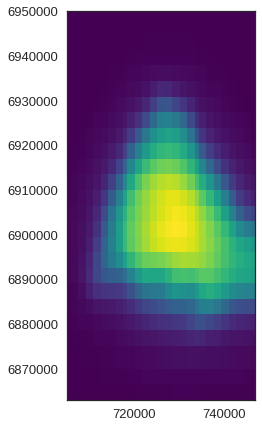

In [108]:

x = np.arange(-10, 10,5 )
y = np.arange(-10, 10, 0.25)
z = np.arange(-10, 10, 0.25)
x, y, z = np.meshgrid(x, y, z)

# create the unstructured grid directly from the numpy arrays and plot
grid = vtkInterface.StructuredGrid(x, y, z)



plt.imshow(grav.reshape(50,50), cmap='viridis', origin='lower',
           extent=[7.050000e+05,747000,6863000,6950000] )


grid.Plot()

In [33]:
vv = gp.plotting.vtkPlot(geo_data)
vv.plot_data_3D()

closing vtk


In [3]:
import vtk

# Create image 1
source1 = vtk.vtkImageMandelbrotSource()
source1.SetWholeExtent(0, 255, 0, 255, 0, 0)
source1.Update()

source1Double = vtk.vtkImageCast()
source1Double.SetInputConnection(0, source1.GetOutputPort())
source1Double.SetOutputScalarTypeToDouble()

# Create image 2
source2 = vtk.vtkImageSinusoidSource()
source2.SetWholeExtent(0, 255, 0, 255, 0, 0)
source2.Update()

# Do the sum
sumFilter = vtk.vtkImageWeightedSum()
sumFilter.SetWeight(0, 0.8)
sumFilter.SetWeight(1, 0.2)
sumFilter.AddInputConnection(source1Double.GetOutputPort())
sumFilter.AddInputConnection(source2.GetOutputPort())
sumFilter.Update()

# Display the images
source1CastFilter = vtk.vtkImageCast()
source1CastFilter.SetInputConnection(source1.GetOutputPort())
source1CastFilter.SetOutputScalarTypeToUnsignedChar()
source1CastFilter.Update()

source2CastFilter = vtk.vtkImageCast()
source2CastFilter.SetInputConnection(source2.GetOutputPort())
source2CastFilter.SetOutputScalarTypeToUnsignedChar()
source2CastFilter.Update()

summedCastFilter = vtk.vtkImageCast()
summedCastFilter.SetInputConnection(sumFilter.GetOutputPort())
summedCastFilter.SetOutputScalarTypeToUnsignedChar()
summedCastFilter.Update()

# Create actors
source1Actor = vtk.vtkImageActor()
if vtk.VTK_MAJOR_VERSION <= 5:
    source1Actor.SetInput(source1CastFilter.GetOutput())
else:
    source1Actor.GetMapper().SetInputConnection(source1CastFilter.GetOutputPort())

source2Actor = vtk.vtkImageActor()
if vtk.VTK_MAJOR_VERSION <= 5:
    source2Actor.SetInput(source2CastFilter.GetOutput())
else:
    source2Actor.GetMapper().SetInputConnection(source2CastFilter.GetOutputPort())

summedActor = vtk.vtkImageActor()
if vtk.VTK_MAJOR_VERSION <= 5:
    summedActor.SetInput(summedCastFilter.GetOutput())
else:
    summedActor.GetMapper().SetInputConnection(summedCastFilter.GetOutputPort())

# There will be one render window
renderWindow = vtk.vtkRenderWindow()
renderWindow.SetSize(600, 300)

# And one interactor
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(renderWindow)

# Define viewport ranges
# (xmin, ymin, xmax, ymax)
leftViewport = [0.0, 0.0, 0.33, 1.0]
centerViewport = [0.33, 0.0, .66, 1.0]
rightViewport = [0.66, 0.0, 1.0, 1.0]

# Setup renderers
leftRenderer = vtk.vtkRenderer()
renderWindow.AddRenderer(leftRenderer)
leftRenderer.SetViewport(leftViewport)
leftRenderer.SetBackground(.6, .5, .4)

centerRenderer = vtk.vtkRenderer()
renderWindow.AddRenderer(centerRenderer)
centerRenderer.SetViewport(centerViewport)
centerRenderer.SetBackground(0.1, 0.5, 0.4)

rightRenderer = vtk.vtkRenderer()
renderWindow.AddRenderer(rightRenderer)
rightRenderer.SetViewport(rightViewport)
rightRenderer.SetBackground(0.4, 0.5, 0.6)

leftRenderer.AddActor(source1Actor)
centerRenderer.AddActor(source2Actor)
rightRenderer.AddActor(summedActor)

leftRenderer.ResetCamera()
centerRenderer.ResetCamera()
rightRenderer.ResetCamera()

renderWindow.Render()
interactor.Start()

In [4]:
dataImporter, source2

((vtkIOImagePython.vtkImageImport)0x7fcce4b3e168,
 (vtkImagingSourcesPython.vtkImageSinusoidSource)0x7fcce46ba648)

In [9]:
dataImporter.Get

In [2]:
# An example from scipy cookbook demonstrating the use of numpy arrys in vtk

import vtk
import numpy as np

# We begin by creating the data we want to render.
# For this tutorial, we create a 3D-image containing three overlaping cubes.
# This data can of course easily be replaced by data from a medical CT-scan or anything else three dimensional.
# The only limit is that the data must be reduced to unsigned 8 bit or 16 bit integers.
data_matrix = np.zeros([75, 75, 75], dtype=np.uint8)
data_matrix[0:35, 0:35, 0:35] = 50
data_matrix[25:55, 25:55, 25:55] = 100
data_matrix[45:74, 45:74, 45:74] = 150

# For VTK to be able to use the data, it must be stored as a VTK-image.
#  This can be done by the vtkImageImport-class which
# imports raw data and stores it.
dataImporter = vtk.vtkImageImport()
# The previously created array is converted to a string of chars and imported.
data_string = data_matrix.tostring()
dataImporter.CopyImportVoidPointer(data_string, len(data_string))
# The type of the newly imported data is set to unsigned char (uint8)
dataImporter.SetDataScalarTypeToUnsignedChar()
# Because the data that is imported only contains an intensity value
#  (it isnt RGB-coded or someting similar), the importer must be told this is the case.
dataImporter.SetNumberOfScalarComponents(1)
# The following two functions describe how the data is stored and the dimensions of the array it is stored in.
#  For this simple case, all axes are of length 75 and begins with the first element.
#  For other data, this is probably not the case.
# I have to admit however, that I honestly dont know the difference between SetDataExtent()
#  and SetWholeExtent() although VTK complains if not both are used.
dataImporter.SetDataExtent(0, 74, 0, 74, 0, 74)
dataImporter.SetWholeExtent(0, 74, 0, 74, 0, 74)
dataImporter.

In [1]:

# The following class is used to store transparencyv-values for later retrival.
#  In our case, we want the value 0 to be
# completly opaque whereas the three different cubes are given different transparency-values to show how it works.
alphaChannelFunc = vtk.vtkPiecewiseFunction()
alphaChannelFunc.AddPoint(0, 0.0)
alphaChannelFunc.AddPoint(50, 0.05)
alphaChannelFunc.AddPoint(100, 0.1)
alphaChannelFunc.AddPoint(150, 0.2)

# This class stores color data and can create color tables from a few color points.
#  For this demo, we want the three cubes to be of the colors red green and blue.
colorFunc = vtk.vtkColorTransferFunction()
colorFunc.AddRGBPoint(50, 1.0, 0.0, 0.0)
colorFunc.AddRGBPoint(100, 0.0, 1.0, 0.0)
colorFunc.AddRGBPoint(150, 0.0, 0.0, 1.0)

# The previous two classes stored properties.
#  Because we want to apply these properties to the volume we want to render,
# we have to store them in a class that stores volume prpoperties.
volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorFunc)
volumeProperty.SetScalarOpacity(alphaChannelFunc)

# This class describes how the volume is rendered (through ray tracing).
#compositeFunction = vtk.vtkVolumeRayCastCompositeFunction()
# We can finally create our volume. We also have to specify the data for it,
#  as well as how the data will be rendered.
volumeMapper = vtk.vtkVolumeRayCastMapper()
#dataImportervolumeMapper.SetVolumeRayCastFunction(compositeFunction)
volumeMapper.SetInputConnection(dataImporter.GetOutputPort())

# The class vtkVolume is used to pair the previously declared volume as well as the properties
#  to be used when rendering that volume.
volume = vtk.vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)

# With almost everything else ready, its time to initialize the renderer and window, as well as
#  creating a method for exiting the application
renderer = vtk.vtkRenderer()
renderWin = vtk.vtkRenderWindow()
renderWin.AddRenderer(renderer)
renderInteractor = vtk.vtkRenderWindowInteractor()
renderInteractor.SetRenderWindow(renderWin)

# We add the volume to the renderer ...
renderer.AddVolume(volume)
# ... set background color to white ...
renderer.SetBackground(0, 0, 0)
# ... and set window size.
renderWin.SetSize(400, 400)


# A simple function to be called when the user decides to quit the application.
def exitCheck(obj, event):
    if obj.GetEventPending() != 0:
        obj.SetAbortRender(1)


# Tell the application to use the function as an exit check.
renderWin.AddObserver("AbortCheckEvent", exitCheck)

renderInteractor.Initialize()
# Because nothing will be rendered without any input, we order the first render manually
#  before control is handed over to the main-loop.
renderWin.Render()
renderInteractor.Start()

AttributeError: module 'vtk' has no attribute 'vtkVolumeRayCastMapper'

In [37]:
vv.vv.s_rend_1[0:2]['val'].values

array([(vtkInteractionWidgetsPython.vtkSphereWidget)0x7f48b1a248e8,
       (vtkInteractionWidgetsPython.vtkSphereWidget)0x7f48b1a244c8], dtype=object)

In [40]:
a = vtkInterface.PlotClass()
a.AddActor(vv.vv.s_rend_1[0:2]['val'].values[0])
a.Add

TypeError: AddActor argument 1: method requires a vtkProp, a vtkSphereWidget was provided.

In [10]:
 # initialize render window
import vtk
renderer = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(renderer)

 self.mapper = vtk.vtkDataSetMapper()
        self.mapper.SetInputData(self.mesh)
        actor, prop = self.AddActor(self.mapper)

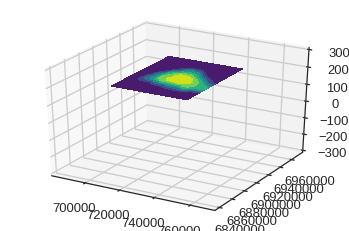

In [74]:

# create the figure
fig = plt.figure()

# show the reference image
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(7.050000e+05,747000,50),
                     np.linspace(6863000,6950000,50))

Z = 500 * np.ones(xx.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx) * np.cos(xx) + np.sin(yy) * np.sin(yy)

ax.contourf(xx, yy, grav.reshape(50,50), offset=200, 
                cmap='viridis')
ax.autoscale_view()

ax.auto_scale_xyz(extent[:2], extent[2:4], extent[4:])

plt.show()

In [50]:
grav

array([ 7.60157776,  7.60149002,  7.60149002, ...,  7.60079098,
        7.60079098,  7.60079098], dtype=float32)

In [ ]:
 sol[0][0].reshape(resolution-1) 

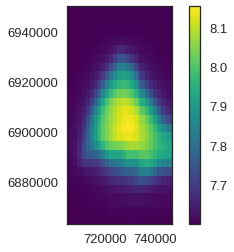

In [51]:
import matplotlib.pyplot as plt

plt.imshow(grav.reshape(50,50), cmap='viridis', origin='lower',
           extent=[7.050000e+05,747000,6863000,6950000] )
plt.colorbar()